In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
filename = 'Fig2C_data.xlsx'
xl = pd.ExcelFile(filename)

# extract Fp data for each sample
fp_ip = xl.parse('fig2C_clean', index_col = 0, header = 0).reset_index()

# transform to long format for downstream process
ip_long = pd.melt(fp_ip, id_vars='index', value_name='Fp')
ip_long.rename(columns = {'variable':'Replicate', 'index':'SampleID'}, inplace = True)


# annotate chemical condition types
atcs = np.tile(np.array([0, 0.01, 0.1, 1, 10, 100]),16)
kans = np.tile(np.repeat(np.array(['0 kan', '50 kan']),12),4)
lins = np.tile(np.repeat(np.array(['0 lin', '3.2 lin']),6),8)

ip_long.insert(1, 'Lin', lins)
ip_long.insert(1, 'Kan', kans)
ip_long.insert(1, 'ATc', atcs)

ip_long

,SampleID,ATc,Kan,Lin,Replicate,Fp
0,Sample_01,0.00,0 kan,0 lin,rep1,0.520388
1,Sample_02,0.01,0 kan,0 lin,rep1,0.552809
2,Sample_03,0.10,0 kan,0 lin,rep1,0.377011
3,Sample_04,1.00,0 kan,0 lin,rep1,0.068843
4,Sample_05,10.00,0 kan,0 lin,rep1,0.006506
...,...,...,...,...,...,...
91,Sample_20,0.01,50 kan,3.2 lin,rep4,0.755556
92,Sample_21,0.10,50 kan,3.2 lin,rep4,0.847500
93,Sample_22,1.00,50 kan,3.2 lin,rep4,0.072381
94,Sample_23,10.00,50 kan,3.2 lin,rep4,0.005758


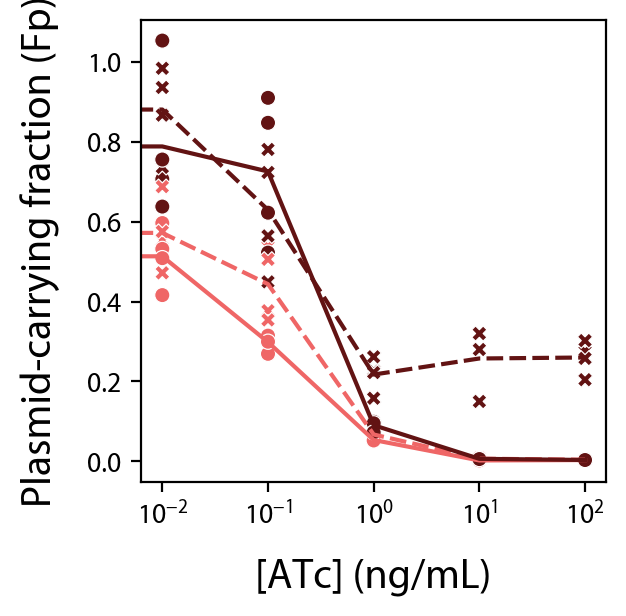

In [3]:
# plot 

fig, axes = plt.subplots(1,1, figsize = (3,3), sharey = True, sharex = True, dpi=200)
plt.rcParams['font.sans-serif'] = "Myriad Pro"

sns.lineplot(data = ip_long, x = 'ATc', y = 'Fp', hue = 'Kan', style = 'Lin', 
             # err_style = 'bars',errorbar=("se", 2),
             style_order = ['3.2 lin', '0 lin'],palette=['#EF6666', '#621313'], errorbar=None)
sns.scatterplot(data = ip_long, x = 'ATc', y = 'Fp', hue = 'Kan', 
                style = 'Lin', style_order = ['3.2 lin', '0 lin'],
                
                s = 30, color=".2",palette=['#EF6666', '#621313'], markers = ['o', 'X'])
axes.set_xscale('log')
axes.set_ylabel('Plasmid-carrying fraction (Fp)', fontsize = 15, labelpad = 10)
axes.set_xlabel('[ATc] (ng/mL)', fontsize = 15, labelpad = 10)
axes.set_xticks([0.01,0.1,1,10,100])
# sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 1))
axes.get_legend().remove()
plt.show()